## This notebook analyzes Seattle AirBNB Data

__Medium Blog post:__ https://medium.com/@manjukiruthika/under-the-lens-seattle-airbnb-listings-993d6311cf44

### Include References

In [64]:
import datetime
import pandas as pd
import numpy as np
import folium
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib.dates as mdates
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
from time import time

%matplotlib inline 

In [65]:
processed_path = "../data/processed/"

### Load Data

__Listings__

In [66]:
seattle_data_listings_df = pd.read_csv("../data/seattle/listings.csv")

In [67]:
seattle_data_listings_df.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview        ...         \
0                                                NaN        ...          
1  Queen Anne is a wonderful, truly functional vi...        ...          
2  Upper Queen Anne is a charming neighborhood fu...        ...          
3                                                NaN        ...          
4  We are in the beautiful neighborhood of Queen ...        ...          

  review_scores_value requires_license license jurisdiction_names  \
0                10.0                f     NaN         WASHINGTON   
1                10.0                f     NaN         WASHINGTON   
2                10.0                f     NaN         WASHINGTON   
3                 NaN                f     NaN         WASHINGTON   
4                 9.0                f     NaN         WASHINGTON   

  instant_bookable cancellation_policy  require_guest_profile_picture  \
0                f            moderate                              f   
1                f              strict                              t   
2                f              strict                              f   
3                f            flexible                              f   
4                f              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [68]:
seattle_data_listings_df.shape

(3818, 92)

In [69]:
seattle_data_listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [70]:

seattle_data_listings_df['host_since_in_years'] = (datetime.datetime.now()-pd.to_datetime(seattle_data_listings_df['host_since'])).astype('timedelta64[Y]')

In [71]:
seattle_data_listings_df

id                            listing_url       scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   
1       953595    https://www.airbnb.com/rooms/953595  20160104002432   
2      3308979   https://www.airbnb.com/rooms/3308979  20160104002432   
3      7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
4       278830    https://www.airbnb.com/rooms/278830  20160104002432   
5      5956968   https://www.airbnb.com/rooms/5956968  20160104002432   
6      1909058   https://www.airbnb.com/rooms/1909058  20160104002432   
7       856550    https://www.airbnb.com/rooms/856550  20160104002432   
8      4948745   https://www.airbnb.com/rooms/4948745  20160104002432   
9      2493658   https://www.airbnb.com/rooms/2493658  20160104002432   
10      175576    https://www.airbnb.com/rooms/175576  20160104002432   
11     4454295   https://www.airbnb.com/rooms/4454295  20160104002432   
12     3883392   https://www.airbnb.com/rooms/3883392  20160104002432   
13     8889257   https://www.airbnb.com/rooms/8889257  20160104002432   
14     5680462   https://www.airbnb.com/rooms/5680462  20160104002432   
15     8988178   https://www.airbnb.com/rooms/8988178  20160104002432   
16     3245876   https://www.airbnb.com/rooms/3245876  20160104002432   
17     4933447   https://www.airbnb.com/rooms/4933447  20160104002432   
18     7735464   https://www.airbnb.com/rooms/7735464  20160104002432   
19     6291829   https://www.airbnb.com/rooms/6291829  20160104002432   
20     9218403   https://www.airbnb.com/rooms/9218403  20160104002432   
21     4125779   https://www.airbnb.com/rooms/4125779  20160104002432   
22     8942678   https://www.airbnb.com/rooms/8942678  20160104002432   
23    10106055  https://www.airbnb.com/rooms/10106055  20160104002432   
24     6362362   https://www.airbnb.com/rooms/6362362  20160104002432   
25     3544550   https://www.airbnb.com/rooms/3544550  20160104002432   
26     9025039   https://www.airbnb.com/rooms/9025039  20160104002432   
27     3200646   https://www.airbnb.com/rooms/3200646  20160104002432   
28     8859380   https://www.airbnb.com/rooms/8859380  20160104002432   
29     4520099   https://www.airbnb.com/rooms/4520099  20160104002432   
...        ...                                    ...             ...   
3788   7745196   https://www.airbnb.com/rooms/7745196  20160104002432   
3789   4645405   https://www.airbnb.com/rooms/4645405  20160104002432   
3790   2755730   https://www.airbnb.com/rooms/2755730  20160104002432   
3791   7949448   https://www.airbnb.com/rooms/7949448  20160104002432   
3792   9288840   https://www.airbnb.com/rooms/9288840  20160104002432   
3793   3312406   https://www.airbnb.com/rooms/3312406  20160104002432   
3794   6621924   https://www.airbnb.com/rooms/6621924  20160104002432   
3795   5673552   https://www.airbnb.com/rooms/5673552  20160104002432   
3796    609701    https://www.airbnb.com/rooms/609701  20160104002432   
3797  10118341  https://www.airbnb.com/rooms/10118341  20160104002432   
3798   2614387   https://www.airbnb.com/rooms/2614387  20160104002432   
3799   7735100   https://www.airbnb.com/rooms/7735100  20160104002432   
3800   5482204   https://www.airbnb.com/rooms/5482204  20160104002432   
3801   4524575   https://www.airbnb.com/rooms/4524575  20160104002432   
3802   8562314   https://www.airbnb.com/rooms/8562314  20160104002432   
3803   9698202   https://www.airbnb.com/rooms/9698202  20160104002432   
3804   7178490   https://www.airbnb.com/rooms/7178490  20160104002432   
3805   8054902   https://www.airbnb.com/rooms/8054902  20160104002432   
3806   5458027   https://www.airbnb.com/rooms/5458027  20160104002432   
3807   4940491   https://www.airbnb.com/rooms/4940491  20160104002432   
3808   1844791   https://www.airbnb.com/rooms/1844791  20160104002432   
3809   6120046   https://www.airbnb.com/rooms/6120046  20160104002432   
3810    262764    https://www.airbnb.com/rooms/262764  20160104002432 

__Data Preparation:__

__Replace % and $ sign in the below fields__

In [72]:
seattle_data_listings_df["host_response_rate"] = seattle_data_listings_df["host_response_rate"].replace('[\%,]', '', regex=True).astype(float)

In [73]:
seattle_data_listings_df["price"] = seattle_data_listings_df["price"].replace('[\$,]', '', regex=True).astype(float)

__Data Preparation : Removing Constants__

In [74]:
seattle_data_listings_df = seattle_data_listings_df.loc[:,seattle_data_listings_df.apply(pd.Series.nunique) > 1]

__Data Understanding: Understand the percentiles of price and availability fields__

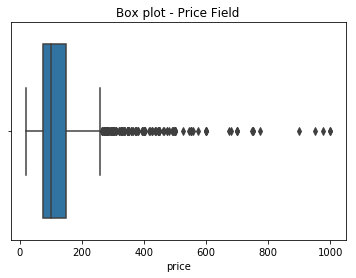

In [75]:
ax = sns.boxplot(seattle_data_listings_df["price"])
plt.title("Box plot - Price Field")
plt.show()

In [76]:
def print_percentiles(field):
    """
    prints percentiles of a field
    field : variable name
    returns : None
    """
    print(("{0}th percentile for price field is {1}").format(5, np.percentile(field,5)))
    print(("{0}th percentile for price field is {1}").format(25, np.percentile(field,25)))
    print(("{0}th percentile for price field is {1}").format(50, np.percentile(field,50)))
    print(("{0}th percentile for price field is {1}").format(75, np.percentile(field,75)))
    print(("{0}th percentile for price field is {1}").format(95, np.percentile(field,95)))

In [77]:
print_percentiles(seattle_data_listings_df["price"])

5th percentile for price field is 45.0
25th percentile for price field is 75.0
50th percentile for price field is 100.0
75th percentile for price field is 150.0
95th percentile for price field is 299.0


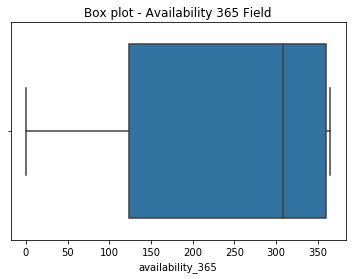

In [78]:
ax = sns.boxplot(seattle_data_listings_df["availability_365"])
plt.title("Box plot - Availability 365 Field")
plt.show()

In [79]:
print_percentiles(seattle_data_listings_df["availability_365"])

5th percentile for price field is 14.0
25th percentile for price field is 124.0
50th percentile for price field is 308.0
75th percentile for price field is 360.0
95th percentile for price field is 365.0


__Load Calendar Data__

In [80]:
seattle_data_calendar_df = pd.read_csv("../data/seattle/calendar.csv")

In [81]:
seattle_data_calendar_df.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [82]:
seattle_data_calendar_df.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [83]:
seattle_data_calendar_df["listing_id"].nunique()

3818

### Descriptive Statistics of the data

In [84]:
def get_stats(df, save_to_file_name):
    """
    Purpose: Provide statistics of fields in the dataframe
    df : dataframe
    save_to_file_name : save statistics results to file
    """
    summary_df = df.describe(include='all').T.reset_index()
    summary_df.to_csv(processed_path +save_to_file_name)
    return summary_df

__Calendar Data : Descriptive Statistics__

In [85]:
get_stats(seattle_data_calendar_df, "seattle_calendar_stats.csv").head(20)

index        count unique         top    freq         mean  \
0  listing_id  1.39357e+06    NaN         NaN     NaN  5.55011e+06   
1        date      1393570    365  2016-08-05    3818          NaN   
2   available      1393570      2           t  934542          NaN   
3       price       934542    669     $150.00   36646          NaN   

           std   min          25%          50%          75%          max  
0  2.96227e+06  3335  3.25821e+06  6.11824e+06  8.03521e+06  1.03402e+07  
1          NaN   NaN          NaN          NaN          NaN          NaN  
2          NaN   NaN          NaN          NaN          NaN          NaN  
3          NaN   NaN          NaN          NaN          NaN          NaN

__Listings Data : Descriptive Statistics__

In [86]:
get_stats(seattle_data_listings_df, "seattle_listing_stats.csv").head(20)

index count unique  \
0                      id  3818    NaN   
1             listing_url  3818   3818   
2                    name  3818   3792   
3                 summary  3641   3478   
4                   space  3249   3119   
5             description  3818   3742   
6   neighborhood_overview  2786   2506   
7                   notes  2212   1999   
8                 transit  2884   2574   
9           thumbnail_url  3498   3498   
10             medium_url  3498   3498   
11            picture_url  3818   3818   
12         xl_picture_url  3498   3498   
13                host_id  3818    NaN   
14               host_url  3818   2751   
15              host_name  3816   1466   
16             host_since  3816   1380   
17          host_location  3810    120   
18             host_about  2959   2011   
19     host_response_time  3295      4   

                                                  top  freq         mean  \
0                                                 NaN   NaN  5.55011e+06   
1                https://www.airbnb.com/rooms/7762347     1          NaN   
2                              Capitol Hill Apartment     3          NaN   
3   This is a modern fully-furnished studio apartm...    15          NaN   
4   *Note: This fall, there will be major renovati...    14          NaN   
5   Our space is a mix of a hostel and a home. We ...    10          NaN   
6   Wallingford is a mostly-residential neighborho...    17          NaN   
7   All of our rentals are fully licensed and regu...    39          NaN   
8   Convenient public transportation. The location...    32          NaN   
9   https://a0.muscache.com/ac/pictures/100481378/...     1          NaN   
10  https://a1.muscache.com/im/pictures/491561/cf5...     1          NaN   
11  https://a2.muscache.com/ac/pictures/108841040/...     1          NaN   
12  https://a0.muscache.com/ac/pictures/95522346/4...     1          NaN   
13                                                NaN   NaN  1.57856e+07   
14          https://www.airbnb.com/users/show/8534462    46          NaN   
15                                             Andrew    56          NaN   
16                                         2013-08-30    51          NaN   
17                 Seattle, Washington, United States  3259          NaN   
18  It would be my pleasure to share and explore t...    46          NaN   
19                                     within an hour  1692          NaN   

            std   min          25%          50%          75%          max  
0   2.96266e+06  3335  3.25826e+06  6.11824e+06  8.03513e+06  1.03402e+07  
1           NaN   NaN          NaN          NaN          NaN          NaN  
2           NaN   NaN          NaN          NaN          NaN          NaN  
3           NaN   NaN          NaN          NaN          NaN          NaN  
4           NaN   NaN          NaN          NaN          NaN          NaN  
5           NaN   NaN          NaN          NaN          NaN          NaN  
6           NaN   NaN          NaN          NaN          NaN          NaN  
7           NaN   NaN          NaN          NaN          NaN          NaN  
8           NaN   NaN          NaN          NaN          NaN          NaN  
9           NaN   NaN          NaN          NaN          NaN          NaN  
10          NaN   NaN          NaN          NaN          NaN          NaN  
11          NaN   NaN          NaN          NaN          NaN          NaN  
12          NaN   NaN          NaN          NaN          NaN          NaN  
13  1.45838e+07  4193   3.2752e+06  1.05581e+07  2.59031e+07  5.32086e+07  
14          NaN   NaN          NaN          NaN          NaN          NaN  
15          NaN   NaN          NaN          NaN          NaN          NaN  
16          NaN   NaN          NaN          NaN          NaN          NaN  
17          NaN   NaN          NaN          NaN          NaN          NaN  
18          NaN   NaN          NaN          NaN          NaN          NaN  
19          NaN   Na

### Business Question 1 : At Airbnb, we would want to know which months of the year are busier in Seattle than others?

__Approach:__ From the calendar data, get all the available listing dates and price. Summing the price and grouping the data by month should mention how busy each month is.

#### Data Preparation

In [87]:
seattle_data_calendar_df["date"] = pd.to_datetime(seattle_data_calendar_df["date"])
seattle_data_calendar_df["price"] = seattle_data_calendar_df["price"].replace('[\$,]', '', regex=True).astype(float)

In [88]:
seattle_data_calendar_df["month"] = seattle_data_calendar_df["date"].dt.month
seattle_data_calendar_group_df = seattle_data_calendar_df.loc[:,["month","price"]]

__Dropping Missing Values__

__Discussion : __ We are dropping the missing values in Calendar data here as were are not considering the cases when listing is not avalable in the calendar.

In [89]:
seattle_data_calendar_group_df = seattle_data_calendar_group_df.dropna()

In [90]:
seattle_data_calendar_group_results_df = seattle_data_calendar_group_df.groupby(["month"]).sum()

In [91]:
seattle_data_calendar_group_results_df = seattle_data_calendar_group_results_df.reset_index()

In [92]:
month_dict = {"1":"Jan",
             "2":"Feb",
             "3":"Mar",
             "4":"Apr",
             "5":"May",
             "6":"Jun",
             "7":"Jul",
             "8":"Aug",
             "9":"Sep",
             "10":"Oct",
             "11":"Nov",
             "12":"Dec"}
seattle_data_calendar_group_results_df["month_text"] = seattle_data_calendar_group_results_df["month"].apply(lambda x: month_dict[str(x)])

In [93]:
seattle_data_calendar_group_results_df = seattle_data_calendar_group_results_df.sort_values(by=["price"], ascending=False)
seattle_data_calendar_group_results_df = seattle_data_calendar_group_results_df.reset_index(drop=True)
seattle_data_calendar_group_results_df

month       price month_text
0      12  11949282.0        Dec
1       8  11502179.0        Aug
2       6  11391415.0        Jun
3      10  11296639.0        Oct
4       7  11288732.0        Jul
5       5  11159008.0        May
6      11  11096625.0        Nov
7       9  11065949.0        Sep
8       3  10798161.0        Mar
9       4  10272371.0        Apr
10      2   9113355.0        Feb
11      1   7981548.0        Jan

__Analysis__

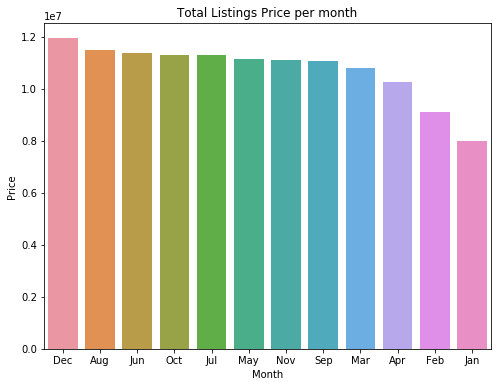

In [94]:
plt.figure(figsize=(8,6))
g = sns.barplot(x=seattle_data_calendar_group_results_df.index, y="price", data=seattle_data_calendar_group_results_df)
g.set(xticklabels=list(seattle_data_calendar_group_results_df["month_text"]))
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Total Listings Price per month")
plt.show()

__Observation__

Month of december seems to be the most busiest indicating winter holiday period around Xmas and new year. The month of august is next busiest indicating school holiday period in summer. Jan is least busier than all the other months.

### Business Question 2 : Which neighbourhoods in Seattle provide the most revenue?

Approach: Listings have neighbourhood information.I've joined/combined listings and calendar data. Summing the price and grouping the data by neighbourhood helps one to determine how much revenue each neighbourhood is making.

In [95]:
seattle_data_neighbourhood = seattle_data_listings_df.loc[:,["id","neighbourhood"]].groupby(["id", "neighbourhood"]).count()

In [96]:
seattle_data_neighbourhood = seattle_data_neighbourhood.reset_index()

In [97]:
seattle_data_neighbourhood

id              neighbourhood
0         3335                     Dunlap
1         4291                  Roosevelt
2         5682             South Delridge
3         6606                Wallingford
4         7369                   Broadway
5         9419                 Georgetown
6         9460                 First Hill
7         9531               The Junction
8         9534               The Junction
9         9596                Wallingford
10       10385                 Maple Leaf
11       10695                 Maple Leaf
12       11012                Wallingford
13       11411                 Maple Leaf
14       13068               Capitol Hill
15       14386                 Green Lake
16       15108                 Green Lake
17       17951               The Junction
18       19611                   Belltown
19       19619                   Belltown
20       19623                   Belltown
21       20868                 Maple Leaf
22       20927                    Ballard
23       20928                    Ballard
24       23192               Capitol Hill
25       23356                 Holly Park
26       23430                   Belltown
27       23919                 Windermere
28       24212                   Belltown
29       25002                    Ballard
...        ...                        ...
3372  10192213                      Minor
3373  10204689                    Madrona
3374  10205366        Industrial District
3375  10208623                 Queen Anne
3376  10210625               Capitol Hill
3377  10211609                 First Hill
3378  10211716                 First Hill
3379  10211928                    Ravenna
3380  10231701                    Ballard
3381  10235014                   Belltown
3382  10235136                Meadowbrook
3383  10247453  Central Business District
3384  10248139                      Minor
3385  10249527                Wallingford
3386  10250735               Capitol Hill
3387  10252110                    Genesee
3388  10262971                    Ballard
3389  10273158  Central Business District
3390  10279830                      Minor
3391  10281965                   Montlake
3392  10292753                   Belltown
3393  10295151               Capitol Hill
3394  10310373                 Queen Anne
3395  10318171                    Stevens
3396  10319529     North Beach/Blue Ridge
3397  10332096              Olympic Hills
3398  10334184               Capitol Hill
3399  10339144               Capitol Hill
3400  10339145                       Alki
3401  10340165                  Greenwood

[3402 rows x 2 columns]

__Joining Listings and Calendar data__

In [98]:
seattle_data_neighbourhood_calendar = pd.merge(seattle_data_calendar_df, seattle_data_neighbourhood, left_on='listing_id', right_on="id", how='left')

In [99]:
seattle_data_neighbourhood_calendar

listing_id       date available  price  month          id  \
0            241032 2016-01-04         t   85.0      1    241032.0   
1            241032 2016-01-05         t   85.0      1    241032.0   
2            241032 2016-01-06         f    NaN      1    241032.0   
3            241032 2016-01-07         f    NaN      1    241032.0   
4            241032 2016-01-08         f    NaN      1    241032.0   
5            241032 2016-01-09         f    NaN      1    241032.0   
6            241032 2016-01-10         f    NaN      1    241032.0   
7            241032 2016-01-11         f    NaN      1    241032.0   
8            241032 2016-01-12         f    NaN      1    241032.0   
9            241032 2016-01-13         t   85.0      1    241032.0   
10           241032 2016-01-14         t   85.0      1    241032.0   
11           241032 2016-01-15         f    NaN      1    241032.0   
12           241032 2016-01-16         f    NaN      1    241032.0   
13           241032 2016-01-17         f    NaN      1    241032.0   
14           241032 2016-01-18         t   85.0      1    241032.0   
15           241032 2016-01-19         t   85.0      1    241032.0   
16           241032 2016-01-20         t   85.0      1    241032.0   
17           241032 2016-01-21         f    NaN      1    241032.0   
18           241032 2016-01-22         f    NaN      1    241032.0   
19           241032 2016-01-23         f    NaN      1    241032.0   
20           241032 2016-01-24         t   85.0      1    241032.0   
21           241032 2016-01-25         t   85.0      1    241032.0   
22           241032 2016-01-26         t   85.0      1    241032.0   
23           241032 2016-01-27         t   85.0      1    241032.0   
24           241032 2016-01-28         t   85.0      1    241032.0   
25           241032 2016-01-29         f    NaN      1    241032.0   
26           241032 2016-01-30         f    NaN      1    241032.0   
27           241032 2016-01-31         f    NaN      1    241032.0   
28           241032 2016-02-01         t   85.0      2    241032.0   
29           241032 2016-02-02         t   85.0      2    241032.0   
...             ...        ...       ...    ...    ...         ...   
1393540    10208623 2016-12-04         f    NaN     12  10208623.0   
1393541    10208623 2016-12-05         f    NaN     12  10208623.0   
1393542    10208623 2016-12-06         f    NaN     12  10208623.0   
1393543    10208623 2016-12-07         f    NaN     12  10208623.0   
1393544    10208623 2016-12-08         f    NaN     12  10208623.0   
1393545    10208623 2016-12-09         f    NaN     12  10208623.0   
1393546    10208623 2016-12-10         f    NaN     12  10208623.0   
1393547    10208623 2016-12-11         f    NaN     12  10208623.0   
1393548    10208623 2016-12-12         f    NaN     12  10208623.0   
1393549    10208623 2016-12-13         f    NaN     12  10208623.0   
1393550    10208623 2016-12-14         f    NaN     12  10208623.0   
1393551    10208623 2016-12-15         f    NaN     12  10208623.0   
1393552    10208623 2016-12-16         f    NaN     12  10208623.0   
1393553    10208623 2016-12-17         f    NaN     12  10208623.0   
1393554    10208623 2016-12-18         f    NaN     12  10208623.0   
1393555    10208623 2016-12-19         f    NaN     12  10208623.0   
1393556    10208623 2016-12-20         f    NaN     12  10208623.0   
1393557    10208623 2016-12-21         f    NaN     12  10208623.0   
1393558    10208623 2016-12-22         f    NaN     12  10208623.0   
1393559    10208623 2016-12-23         f    NaN     12  10208623.0   
1393560    10208623 2016-12-24         f    NaN     12  10208623.0   
1393561    10208623 2016-12-25         f    NaN     12  10208623.0   
1393562    10208623 2016-12-26         f    NaN     12  10208623.0   
1393563    10208623 2016-12-27         f    NaN     12  10208623.0   
1393564    10208623 2016-12-28         f    NaN     12  10208623.0   
1393565    10208623

In [100]:
seattle_data_neighbourhood_calendar_group_results_df = seattle_data_neighbourhood_calendar.loc[:,["neighbourhood","price"]].groupby(["neighbourhood"]).sum()

In [101]:
seattle_data_neighbourhood_calendar_group_results_df = seattle_data_neighbourhood_calendar_group_results_df.reset_index()

__Analysis__

In [102]:
seattle_data_neighbourhood_sorted_df = seattle_data_neighbourhood_calendar_group_results_df.nlargest(10,'price')
seattle_data_neighbourhood_sorted_df = seattle_data_neighbourhood_sorted_df.reset_index(drop=True)
seattle_data_neighbourhood_sorted_df

neighbourhood       price
0               Capitol Hill  10753516.0
1                   Belltown   9545080.0
2                 Queen Anne   8249113.0
3                    Ballard   6744518.0
4                      Minor   6649223.0
5                    Fremont   5264507.0
6                Wallingford   4773675.0
7  Central Business District   4501319.0
8                 First Hill   3551078.0
9                   Magnolia   3156841.0

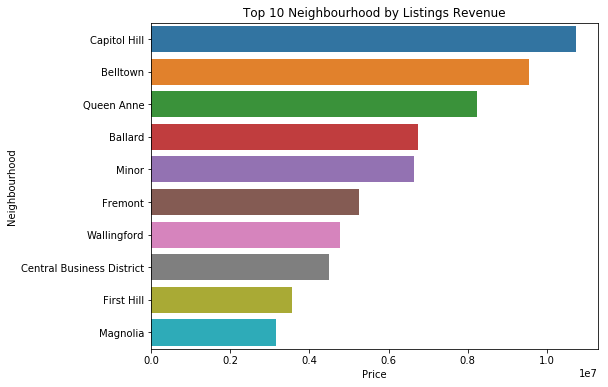

In [103]:
plt.figure(figsize=(8,6))
g = sns.barplot(x="price", y="neighbourhood", data=seattle_data_neighbourhood_sorted_df)
plt.xlabel("Price")
plt.ylabel("Neighbourhood")
plt.title("Top 10 Neighbourhood by Listings Revenue")
plt.show()

__Observation__:

Capitol hill neighbourhood seems to make the most revenue. Either it has more listings available or it has listings which are priced higher

### Data Understanding

__Understanding the data type of each column in listings : Getting a list of Numeric Columns__

In [104]:
## Finding the data type of Variables
verbose = True

numeric_cols = []
numeric_cols_with_id = []
for col in seattle_data_listings_df.columns:
    s = seattle_data_listings_df[col]
    
    if col in {'scrape_id', 'host_id', 'latitude', 'longitude'}:
        continue
        
    if s.dtype == object or s.dtype.name == 'category': # or 'Hour and date' in col:
        col_type = 'Category'
        #sdf = pd.get_dummies(s)
        #x_col = sp.csr_matrix(sdf)
        #X.append(x_col)
        #names.extend(['{} = {}'.format(col, c) for c in sdf.columns])
    else:
        col_type = 'Numeric'
        if col == 'id':
            numeric_cols_with_id.append(col)
        else:
            numeric_cols_with_id.append(col)
            numeric_cols.append(col)
        #x_col = s.astype(float).fillna(0.0).values.reshape(-1, 1)
        #x_col = sp.csr_matrix(MinMaxScaler().fit_transform(x_col))
        #X.append(x_col)
        #names.append(col.strip())
        
    if verbose:
        print('* {} - {}'.format(col.strip(), col_type))
        
print('* Numeric columns {}'.format(numeric_cols))

* id - Numeric
* listing_url - Category
* name - Category
* summary - Category
* space - Category
* description - Category
* neighborhood_overview - Category
* notes - Category
* transit - Category
* thumbnail_url - Category
* medium_url - Category
* picture_url - Category
* xl_picture_url - Category
* host_url - Category
* host_name - Category
* host_since - Category
* host_location - Category
* host_about - Category
* host_response_time - Category
* host_response_rate - Numeric
* host_acceptance_rate - Category
* host_is_superhost - Category
* host_thumbnail_url - Category
* host_picture_url - Category
* host_neighbourhood - Category
* host_listings_count - Numeric
* host_total_listings_count - Numeric
* host_verifications - Category
* host_has_profile_pic - Category
* host_identity_verified - Category
* street - Category
* neighbourhood - Category
* neighbourhood_cleansed - Category
* neighbourhood_group_cleansed - Category
* city - Category
* state - Category
* zipcode - Category
*

### Business Question 3: Are there any property related factors that affect the price?

__Approach :__ Extracting the numeric columns, I check whether there is any linear relationship between the numeric variables and price by running a correlation plot.

#### Analysis :  Correlation between numeric variables and price

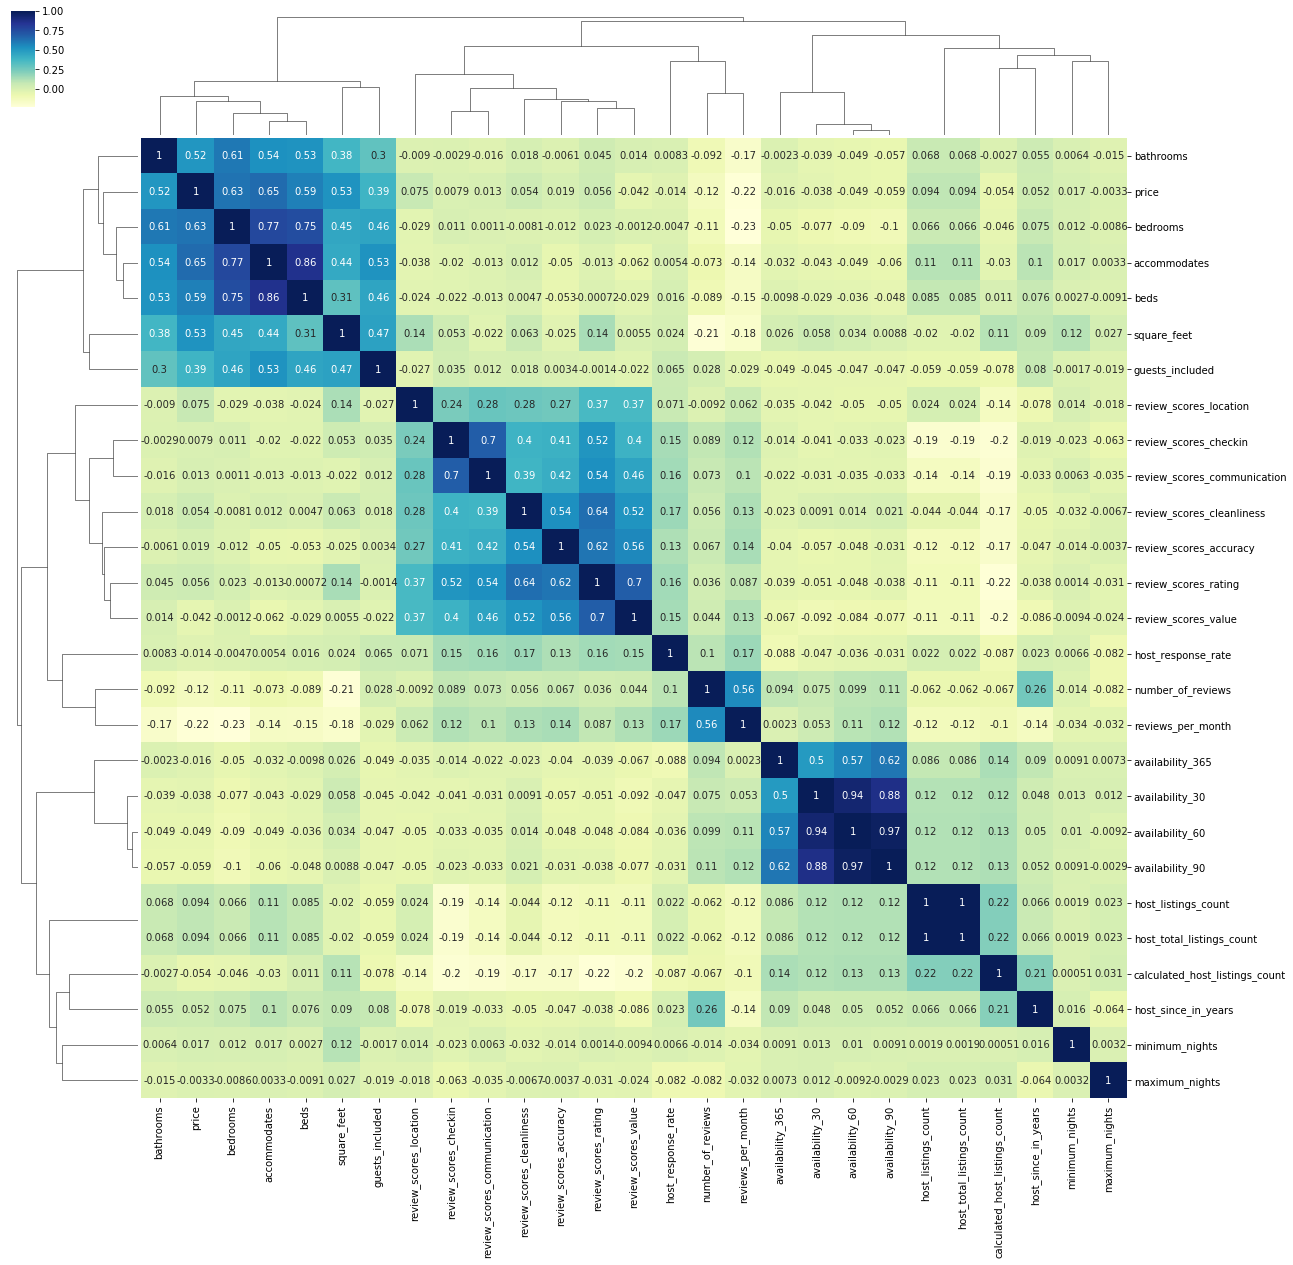

In [41]:
fig_size = (20, 20)
fig = sns.clustermap(seattle_data_listings_df.loc[:,numeric_cols].corr().fillna(0.0), annot=True, figsize=fig_size,cmap="YlGnBu")
plt.setp(fig.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

__Observation__

From the hierarchical correlation plot, above one could observe that there are blocks of sections which are correlated within each other. Let us take the first block which has the price field. We could observe that price is correlated with bathrooms, bedrooms, accomodates (number of people it accomodates), beds, guests included and square feet. Negative correlation between reviews per month and price indicating that high priced  properties have fewer reviews.

### Business Question 4 : Does location / neighbourhood have an effect on price? Are we seeing any pattern of listings / price on the location map

__Approach:__  From the percentiles obtained for price, we divide the price into 3 ranges - low, medium and high. Any value below 25th percentile is low and between 25th and 75th percentile is medium and above 75th percentile is high.
We then plot the listings and their price ranges on the map based on longitude and latitude. The idea is to observe are there any locations which have more low price listings?. Are there locations which have high price and medium price listings?

In [105]:
def get_class_label(price):
    """
    Return a class label based on price ranges.
    price: listings price value
    returns : class label
    """
    if price <75:
        return 1
    elif price >=75 and price <150:
        return 2
    else:
        return 3

In [106]:
   
seattle_data_listings_df['price_label'] = seattle_data_listings_df['price'].apply(lambda x : get_class_label(x))

lat_long_df = pd.DataFrame()

lat_long_df['latitude'] = seattle_data_listings_df['latitude']
lat_long_df['longitude'] = seattle_data_listings_df['longitude']
lat_long_df['cluster'] = seattle_data_listings_df['price_label']

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [44]:
lat_long_df

latitude   longitude  cluster
0     47.636289 -122.371025        2
1     47.639123 -122.365666        3
2     47.629724 -122.369483        3
3     47.638473 -122.369279        2
4     47.632918 -122.372471        3
5     47.630525 -122.366174        2
6     47.636605 -122.368519        2
7     47.640161 -122.375856        1
8     47.632410 -122.357216        2
9     47.637492 -122.366889        3
10    47.635482 -122.358478        2
11    47.637214 -122.360046        2
12    47.635546 -122.373171        3
13    47.629507 -122.367629        3
14    47.639203 -122.365863        3
15    47.635650 -122.372893        2
16    47.626200 -122.366602        1
17    47.640646 -122.372406        2
18    47.639776 -122.372235        3
19    47.636025 -122.358694        3
20    47.627940 -122.364959        2
21    47.636374 -122.361033        2
22    47.635632 -122.358881        3
23    47.633394 -122.371920        2
24    47.638517 -122.369581        3
25    47.631397 -122.367767        3
26    47.638752 -122.367973        3
27    47.639266 -122.374726        1
28    47.629907 -122.368948        3
29    47.639816 -122.374338        2
...         ...         ...      ...
3788  47.656739 -122.344865        2
3789  47.661171 -122.349923        1
3790  47.649271 -122.347817        3
3791  47.659149 -122.363466        2
3792  47.663040 -122.348499        2
3793  47.660056 -122.357683        2
3794  47.654199 -122.359987        2
3795  47.650124 -122.343283        3
3796  47.656508 -122.360571        2
3797  47.658976 -122.354915        1
3798  47.655381 -122.343205        2
3799  47.652902 -122.352110        1
3800  47.663613 -122.349519        3
3801  47.657078 -122.358795        2
3802  47.650765 -122.347787        3
3803  47.661131 -122.349238        3
3804  47.660856 -122.352401        2
3805  47.653158 -122.356285        2
3806  47.656057 -122.354514        3
3807  47.654304 -122.342720        2
3808  47.662036 -122.350485        3
3809  47.648689 -122.343915        2
3810  47.654205 -122.352604        3
3811  47.657898 -122.346692        1
3812  47.654516 -122.358124        2
3813  47.664295 -122.359170        3
3814  47.649552 -122.318309        2
3815  47.508453 -122.240607        2
3816  47.632335 -122.275530        2
3817  47.641186 -122.342085        2

[3818 rows x 3 columns]

In [45]:
m = folium.Map(location=[47.732647,-122.341301 
], zoom_start=7)

In [46]:
colors = [
    'pink',
    'blue',
    'green',
    'orange', 
    'black',
    'orange',
    'beige',
    'green',
    'darkgreen',
    'lightgreen',
    'darkblue',
    'lightblue',
    'purple',
    'darkpurple',
    'darkred',
    'cadetblue',
    'gray',
    'lightred'
]

def get_popup_text(label):
    """
    returns meaningful description of popup
    label : price label value
    """
    if label==1:
        return 'low'
    elif label==2:
        return 'medium'
    else:
        return 'high'

for i in range(0,lat_long_df.shape[0]):
    #print(i)
    folium.Marker( [lat_long_df.iloc[i]['latitude'],lat_long_df.iloc[i]['longitude']], popup=get_popup_text(int(lat_long_df.iloc[i]['cluster'])),icon=folium.Icon(color=colors[int(lat_long_df.iloc[i]['cluster'])])).add_to(m)
    
legend_html = '''
     <div style="position: fixed; bottom: 50px; left: 50px; width: 100px; height: 90px; border:2px solid grey; z-index:9999; font-size:14px;">&nbsp; Low &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#5DADE2"></i><br>&nbsp; Medium &nbsp; <i class="fa fa-map-marker fa-2x" style=”color:#64C714”></i><br>&nbsp; High Price <i class="fa fa-map-marker fa-2x" style="color:#D68910"></i></div>'''

m.get_root().html.add_child(folium.Element(legend_html))


In [47]:
m

<img src="../plots/Seattle_Price_on_Map1.png">

In [48]:
m.save('seattle_folium_map.html')


__Observation:__ Studying the map, one could observe prevalance of low/medium/high listings. For instance, around Univeristy of Washington there are many low and medium priced listings. Around capitol hill area, there are more prevalance of medium and high price listings

### Business Question 5 : Are we able to predict price ranges (low/medium/high) based on property, host and review information?

__Approach :__ In the earlier section of code, i considered only the numeric variables to understand their effect on price. Now combining the categorical variables like the property, host and review information - I check whether we are able to predict the price range of a property as low / medium and high? Instead of predicting price with the small volume of data, I've turned it into a classification problem where I'm predicting price ranges(low/medium/high). I choose a machine learning algorithm - Random Forests Classifier. This tree based algorithm, could handle combination of categorical and numeric data to help predict the price ranges. The data is split into 80% train and 20% test sets. 5 fold cross validation is carried out on the training data for different number of estimators. The optimal hyperparameter is chosen and the algorithm is trained with the optimal parameter. It is then tested on 20% data. 
Accuracy metric is used for evaluation of the algorithm.

In [165]:
data_df = seattle_data_listings_df.loc[:,['property_type', 'room_type', 'accommodates', 'host_response_time', 'host_response_rate', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'host_listings_count', 'guests_included', 'number_of_reviews','minimum_nights','maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value','reviews_per_month','availability_365','host_since_in_years','price_label']]

__Handling Missing Values__

In [166]:
print("Number of nulls before data processing")
data_df.isnull().sum()

Number of nulls before data processing


property_type                    1
room_type                        0
accommodates                     0
host_response_time             523
host_response_rate             523
bathrooms                       16
bedrooms                         6
beds                             1
bed_type                         0
host_listings_count              2
guests_included                  0
number_of_reviews                0
minimum_nights                   0
maximum_nights                   0
review_scores_rating           647
review_scores_accuracy         658
review_scores_cleanliness      653
review_scores_checkin          658
review_scores_communication    651
review_scores_location         655
review_scores_value            656
reviews_per_month              627
availability_365                 0
host_since_in_years              2
price_label                      0
dtype: int64

In [167]:
# data_df['host_response_rate'] = data_df['host_response_rate'].fillna(data_df['host_response_rate'].mean())
# data_df['review_scores_rating'] = data_df['review_scores_rating'].fillna(data_df['review_scores_rating'].mean())
# data_df['review_scores_accuracy'] = data_df['review_scores_accuracy'].fillna(data_df['review_scores_accuracy'].mean())
# data_df['review_scores_cleanliness'] = data_df['review_scores_cleanliness'].fillna(data_df['review_scores_cleanliness'].mean())
# data_df['review_scores_checkin'] = data_df['review_scores_checkin'].fillna(data_df['review_scores_checkin'].mean())
# data_df['review_scores_communication'] = data_df['review_scores_communication'].fillna(data_df['review_scores_communication'].mean())
# data_df['review_scores_location'] = data_df['review_scores_location'].fillna(data_df['review_scores_location'].mean())
# data_df['review_scores_value'] = data_df['review_scores_value'].fillna(data_df['review_scores_value'].mean())
# data_df['reviews_per_month'] = data_df['reviews_per_month'].fillna(data_df['reviews_per_month'].mean())

__Discussion on missing values:__ Observing the missing values in the selected columns we could see that most of the missing values are in the review and host information. The amount of data without nulls is 75% of the data (2834 indicated in df.shape in cells below). I've decided to drop the null values here as i conducted experiments filling missing reviews with mean and the classification algorithm's accuracy does not improve. I decided to proceed on removing rows with null records and including only non-null rows. For future problems, where including more data increases accuracy we could add approaches like imputing methods - fit transform on training set and transform on test set.

__Handle Categorical Data__

__Discussion on categorical data:__ For this problem, I'm dummy encoding the categorical variables. Random forest is good with categorical data but label encoding might not work well for algorithms which could take magnitude of the categorical variable into consideration like logistic regression. So I preferred a dummy encoding approach which would be suitable for all kinds of machine learning algorithms.

In [168]:
data_df = pd.get_dummies(data_df)

In [169]:
data_df.shape

(3818, 49)

In [170]:
data_df

accommodates  host_response_rate  bathrooms  bedrooms  beds  \
0                4                96.0        1.0       1.0   1.0   
1                4                98.0        1.0       1.0   1.0   
2               11                67.0        4.5       5.0   7.0   
3                3                 NaN        1.0       0.0   2.0   
4                6               100.0        2.0       3.0   3.0   
5                2                 NaN        1.0       1.0   1.0   
6                2               100.0        1.0       1.0   1.0   
7                2               100.0        1.0       1.0   1.0   
8                2                 NaN        1.0       1.0   1.0   
9                4                98.0        1.0       1.0   1.0   
10               2               100.0        1.0       1.0   1.0   
11               2               100.0        1.0       1.0   1.0   
12               4               100.0        1.0       2.0   3.0   
13               5               100.0        1.0       2.0   3.0   
14              16               100.0        3.5       6.0  15.0   
15               5               100.0        1.0       2.0   2.0   
16               2               100.0        1.0       1.0   1.0   
17               2               100.0        1.0       1.0   1.0   
18               2                 NaN        2.0       1.0   1.0   
19              10                 NaN        3.5       5.0   5.0   
20               1               100.0        1.0       1.0   1.0   
21               3               100.0        1.5       1.0   2.0   
22               8               100.0        2.0       4.0   4.0   
23               2                 NaN        1.0       1.0   1.0   
24               5                 NaN        2.5       3.0   3.0   
25               8                67.0        2.5       3.0   5.0   
26               5               100.0        1.0       2.0   3.0   
27               2               100.0        1.0       1.0   1.0   
28               6               100.0        2.0       3.0   3.0   
29               3                71.0        1.0       1.0   2.0   
...            ...                 ...        ...       ...   ...   
3788             4               100.0        1.0       1.0   2.0   
3789             2               100.0        1.0       1.0   1.0   
3790             6               100.0        1.0       2.0   3.0   
3791             2               100.0        1.0       1.0   1.0   
3792             4               100.0        1.0       1.0   1.0   
3793             4               100.0        1.0       0.0   2.0   
3794             2                80.0        1.0       1.0   1.0   
3795             4               100.0        1.0       0.0   1.0   
3796             2               100.0        1.0       1.0   1.0   
3797             2               100.0        1.0       0.0   1.0   
3798             2               100.0        1.0       1.0   1.0   
3799             2                25.0        1.0       1.0   1.0   
3800             2                 NaN        1.5       1.0   1.0   
3801             2               100.0        1.0       1.0   1.0   
3802             4                 NaN        1.0       2.0   2.0   
3803            16                97.0        3.5       4.0  10.0   
3804             2               100.0        1.0       0.0   1.0   
3805             6               100.0        1.0       2.0   2.0   
3806             4               100.0        1.0       2.0   2.0   
3807             2               100.0        1.0       0.0   1.0   
3808             6               100.0        2.0       3.0   3.0   
3809             4               100.0        1.0       1.0   1.0   
3810             5               100.0        1.0       2.0   3.0   
3811             3               100.0        1.0       1.0   1.0   
3812             4               100.0        1.0       1.0   2.0   
3813             6                99.0        2.0       3.0   3.0   
3814

In [171]:
columns_minus_price = list(set(data_df.columns)-set(['price','price_label']))

In [172]:
columns_minus_price

['bed_type_Airbed',
 'bedrooms',
 'host_since_in_years',
 'property_type_House',
 'property_type_Bed & Breakfast',
 'bathrooms',
 'property_type_Cabin',
 'property_type_Townhouse',
 'number_of_reviews',
 'bed_type_Pull-out Sofa',
 'availability_365',
 'property_type_Other',
 'bed_type_Real Bed',
 'review_scores_accuracy',
 'review_scores_location',
 'host_response_time_a few days or more',
 'bed_type_Couch',
 'bed_type_Futon',
 'property_type_Camper/RV',
 'review_scores_checkin',
 'review_scores_rating',
 'property_type_Boat',
 'review_scores_cleanliness',
 'property_type_Loft',
 'host_response_time_within a day',
 'host_response_time_within an hour',
 'room_type_Shared room',
 'host_response_time_within a few hours',
 'property_type_Chalet',
 'property_type_Tent',
 'room_type_Entire home/apt',
 'beds',
 'host_listings_count',
 'maximum_nights',
 'property_type_Bungalow',
 'property_type_Dorm',
 'review_scores_communication',
 'review_scores_value',
 'minimum_nights',
 'guests_included

__Discussion handled above in <I> Discussion on Missing Values </I>__

In [173]:
data_df = data_df.dropna()

In [174]:
data_df.shape

(2834, 49)

In [175]:
best_params = {}
parameters = {'n_estimators': [25, 50, 100, 150, 200, 250]}

X_train, X_test, y_train, y_test = train_test_split(data_df.loc[:,columns_minus_price], data_df['price_label'],
                                                    train_size=0.8,
                                                    random_state=0)

# X_train, X_test, y_train, y_test = train_test_split(data_df.loc[:,columns_minus_price], data_df['price_label'],train_size=0.8)

rf_clf = RandomForestClassifier(class_weight='balanced', random_state=0, max_depth=5)
grid_search = GridSearchCV(rf_clf, parameters, scoring='f1_macro', cv=5, verbose=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_estimators=25 .................................................
[CV] ........ n_estimators=25, score=0.6943422519509476, total=   0.0s
[CV] n_estimators=25 .................................................
[CV] ........ n_estimators=25, score=0.6976089909782105, total=   0.0s
[CV] n_estimators=25 .................................................
[CV] ......... n_estimators=25, score=0.710036271316691, total=   0.0s
[CV] n_estimators=25 .................................................
[CV] ........ n_estimators=25, score=0.6954652036686865, total=   0.0s
[CV] n_estimators=25 .................................................
[CV] ........ n_estimators=25, score=0.6843655883483474, total=   0.0s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s


[CV] ........ n_estimators=50, score=0.7029505582137161, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] ........ n_estimators=50, score=0.7018315237370724, total=   0.0s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s remaining:    0.0s


[CV] ........ n_estimators=50, score=0.7038906945063279, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] ........ n_estimators=50, score=0.6860590145776427, total=   0.0s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


[CV] ........ n_estimators=50, score=0.6864129277707325, total=   0.0s
[CV] n_estimators=100 ................................................
[CV] ........ n_estimators=100, score=0.693908969210174, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.7041551242975901, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.7013974548352547, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.6863524909286918, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] ........ n_estimators=100, score=0.681335637857377, total=   0.1s
[CV] n_estimators=150 ................................................
[CV] ....... n_estimators=150, score=0.6984013977989881, total=   0.2s
[CV] n_estimators=150 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.2s finished


In [176]:
best_params

{'n_estimators': 25}

In [177]:
best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], random_state=0, class_weight="balanced")
#best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'])
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [178]:
# Evaluate the model using the full dataset# Evalua 
from sklearn.metrics import accuracy_score

p = best_model.predict(X_train)
print("Training Accuracy", accuracy_score(y_train, p))   # sanity check

Training Accuracy 0.9960299955888839


In [179]:
# Evaluate the model using the full dataset
p = best_model.predict(X_test)
print("Test Accuracy", accuracy_score(y_test, p))   # sanity check

Test Accuracy 0.7707231040564374


In [180]:
indices = np.argsort(best_model.feature_importances_)[::-1]
print(indices)
print([columns_minus_price[i] for i in indices])

[30 40 47  1  8 10 41 20 31  5 32 39  2 33 38 45 37 14 46 26 22  3 13 25
 27 19 24 36 12 23 42  4  7 17 15  9 11  6 18 35 34 16 29  0 44 28 21 43]
['room_type_Entire home/apt', 'accommodates', 'reviews_per_month', 'bedrooms', 'number_of_reviews', 'availability_365', 'room_type_Private room', 'review_scores_rating', 'beds', 'bathrooms', 'host_listings_count', 'guests_included', 'host_since_in_years', 'maximum_nights', 'minimum_nights', 'host_response_rate', 'review_scores_value', 'review_scores_location', 'property_type_Apartment', 'room_type_Shared room', 'review_scores_cleanliness', 'property_type_House', 'review_scores_accuracy', 'host_response_time_within an hour', 'host_response_time_within a few hours', 'review_scores_checkin', 'host_response_time_within a day', 'review_scores_communication', 'bed_type_Real Bed', 'property_type_Loft', 'property_type_Condominium', 'property_type_Bed & Breakfast', 'property_type_Townhouse', 'bed_type_Futon', 'host_response_time_a few days or more', 

In [181]:
columns_n_importances = [(columns_minus_price[i], best_model.feature_importances_[i]) for i in indices]

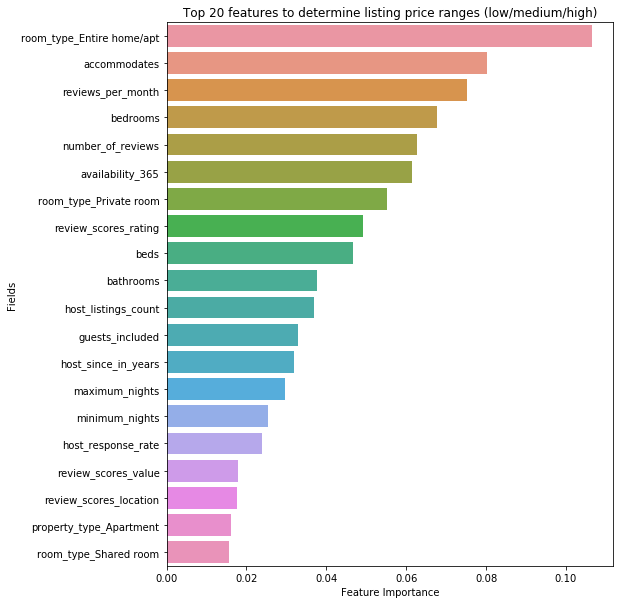

In [182]:
plt.figure(figsize=(8,10))
g = sns.barplot(x=[i[1] for i in columns_n_importances[:20]], y=[i[0] for i in columns_n_importances[:20]], data=seattle_data_calendar_group_results_df)
plt.xlabel("Feature Importance")
plt.ylabel("Fields")
plt.title("Top 20 features to determine listing price ranges (low/medium/high)")
plt.show()

__Observation:__

Based on our experiment on using a classification algorithm for detecting the price ranges, one could observe that the test set has an accuracy ~75%. The features are ranked based on their importance and the visualisation shows the top 20 variables which have an impact on determining the price range. We could observe that room type entire home/appt, reviews per month, number of people it accomodates, number of bedrooms and availability all have an impact on determining the price ranges.



__Conclusion and Remarks__:
Either with more data and better algorithm one could improve on the classification results of predicting price ranges. Data has room for further analysis - checking how temporal information has an impact on price etc. 